In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=cc4e5a1c2563b4054f8ad9c40251d071b46e4406cb4279409fa2620be61ddb72
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=ac1ec1cdbbd4790aff400a786f001d016d9469be1d90fe7932755f69a63912d7
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
# Mount the Google Drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import umap
import csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from utils import CautDataloaderRegular


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

    
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def SVM_grid_search(csv_path,
                     visual_data_dir,
                     visual_data_mode,
                     audio_data_dir,
                     fusion_mode,
                     visual_approach_type,
                     audio_feature_type,
                     threshold=0.5,
                     required_FPS=30,
                     input_length_in_seconds=3,
                     class_to_num_dict={"truth": 0, "lie": 1}):
    
    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Fused(csv_path,
                                                             visual_data_dir,
                                                             visual_data_mode,
                                                             audio_data_dir,
                                                             fusion_mode,
                                                             visual_approach_type=visual_approach_type,  # average or frame-based
                                                             required_FPS=required_FPS,
                                                             input_length_in_seconds=input_length_in_seconds,
                                                             audio_feature_type=audio_feature_type,  # MFCC, RMS, Chroma
                                                             class_to_num_dict=class_to_num_dict)
    
    if visual_data_mode == "OpenFace" and visual_approach_type == "average":
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
    else:
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
        X_train[np.isnan(X_train)] = 0
        X_test[np.isnan(X_test)] = 0
    
    param_grid = {
        'C': [0.1, 1, 10, 100], 
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
        'gamma': ['scale', 'auto', 0.1, 1, 10]
    }

    svm = SVC()

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters found
    print(grid_search.best_params_)
    
    depth, estimators = None, None
    
    return depth, estimators
        
def SVM_Model(csv_path,
               visual_data_dir,
               visual_data_mode,
               audio_data_dir,
               # coord_selection,
               fusion_mode,
               visual_approach_type,  # average or frame-based
               audio_feature_type,  # MFCC, RMS, Chroma
               threshold,
               required_FPS,
               input_length_in_seconds,
               class_to_num_dict,
               train_verbose):

    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Fused(csv_path,
                                                             visual_data_dir,
                                                             visual_data_mode,
                                                             audio_data_dir,
                                                             # coord_selection,
                                                             fusion_mode,
                                                             visual_approach_type=visual_approach_type,  # average or frame-based
                                                             required_FPS=required_FPS,
                                                             input_length_in_seconds=input_length_in_seconds,
                                                             audio_feature_type=audio_feature_type,  # MFCC, RMS, Chroma
                                                             class_to_num_dict=class_to_num_dict,
                                                             verbose=train_verbose)
    
    if visual_data_mode == "OpenFace" and visual_approach_type == "average":
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
    else:
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
        X_train[np.isnan(X_train)] = 0
        X_test[np.isnan(X_test)] = 0
    
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    # depth, estimators = SVM_grid_search(csv_path,
    #                                     visual_data_dir,
    #                                     visual_data_mode,
    #                                     audio_data_dir,
    #                                     fusion_mode,
    #                                     visual_approach_type=visual_approach_type,  # average or frame-based
    #                                     required_FPS=required_FPS,
    #                                     input_length_in_seconds=input_length_in_seconds,
    #                                     audio_feature_type=audio_feature_type,  # MFCC, RMS, Chroma
    #                                     class_to_num_dict=class_to_num_dict)
    
    # svm = svm.SVC(n_estimators=estimators, max_depth=depth)
    
    # X_train, y_train = X_y_data[0].reshape(len(X_y_data[0]), -1), X_y_data[1]
    # X_test, y_test = X_y_data[2].reshape(len(X_y_data[2]), -1), X_y_data[3]

    # precomputed kernel
    gram_train = np.dot(X_train, X_train.T)
    clf = svm.SVC(kernel='precomputed')
    clf.fit(gram_train, y_train)

    # predict on test set
    gram_test = np.dot(X_test, X_train.T)
    y_pred = clf.predict(gram_test)

    # get metrics (accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision", precision)
    print("Recall", recall)

    # show confusion matrix
    CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)


In [9]:
def SVM_Model(csv_path,
               visual_data_dir,
               visual_data_mode,
               audio_data_dir,
               # coord_selection,
               fusion_mode,
               visual_approach_type,  # average or frame-based
               audio_feature_type,  # MFCC, RMS, Chroma
               threshold,
               required_FPS,
               input_length_in_seconds,
               class_to_num_dict,
               train_verbose):

    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Fused(csv_path,
                                                             visual_data_dir,
                                                             visual_data_mode,
                                                             audio_data_dir,
                                                             # coord_selection,
                                                             fusion_mode,
                                                             visual_approach_type=visual_approach_type,  # average or frame-based
                                                             required_FPS=required_FPS,
                                                             input_length_in_seconds=input_length_in_seconds,
                                                             audio_feature_type=audio_feature_type,  # MFCC, RMS, Chroma
                                                             class_to_num_dict=class_to_num_dict,
                                                             verbose=train_verbose)
    
    if visual_data_mode == "OpenFace" and visual_approach_type == "average":
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
    else:
        X_train, y_train = X_y_data[0].reshape(-1, X_y_data[0].shape[1] * X_y_data[0].shape[2]), X_y_data[1]
        X_test, y_test = X_y_data[2].reshape(-1, X_y_data[2].shape[1] * X_y_data[2].shape[2]), X_y_data[3]
        X_train[np.isnan(X_train)] = 0
        X_test[np.isnan(X_test)] = 0

    # precomputed kernel
    clf = svm.SVC()
    clf.fit(X_train, y_train)

    # predict on test set
    y_pred = clf.predict(X_test)

    # get metrics (accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision", precision)
    print("Recall", recall)

    # show confusion matrix
    CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)


###OPENFACE AVERAGE

audio_data_dir updated to: /content/drive/MyDrive/606 captsone/audio_features/MFCC_audio_features

Selected csv_path: /content/drive/MyDrive/606 captsone/
Video failed to be processed by OpenFace. Videoname=trial_lie_015_008. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_lie_053_007. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_lie_053_006. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_truth_025_008. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_lie_053_002. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_truth_025_007. Skipping...
Accuracy: 0.6742081447963801
Precision 0.7142857142857143
Recall 0.6410256410256411


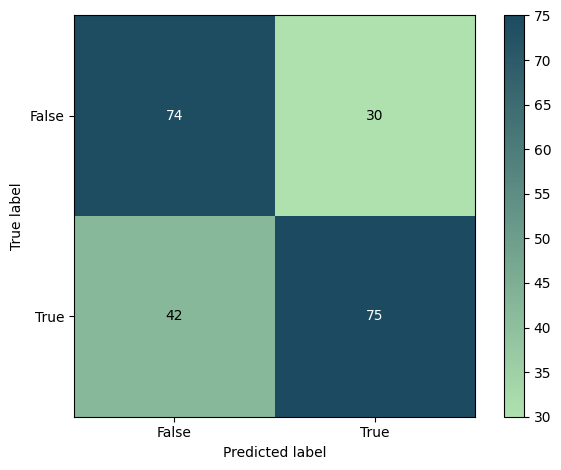

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 75
     - False Positive           : 30
     - True Negative            : 74
     - False Negative           : 42
     - True Positive Rate       :  0.6410256410256411
     - True Negative Rate       :  0.7115384615384616
     - Positive Predictive Value:  0.7142857142857143
     - Negative predictive value:  0.6379310344827587
     - False Positive Rate      :  0.28846153846153844
     - False Negative Rate      :  0.358974358974359
     - False Discovery Rate     :  0.2857142857142857


In [10]:
SVM_Model(csv_path= "/content/drive/MyDrive/606 captsone/",
          visual_data_dir="/content/drive/MyDrive/606 captsone/OpenFace_Final/",
          visual_data_mode="OpenFace",
          audio_data_dir="/content/drive/MyDrive/606 captsone/audio_features/",
          # coord_selection,
          fusion_mode="+",
          visual_approach_type="average",  # average or frame-based
          audio_feature_type="MFCC",  # MFCC, RMS, Chroma
          threshold=0.5,
          required_FPS=30,
          input_length_in_seconds=3,
          class_to_num_dict={"truth": 0, "lie": 1},
          train_verbose= False)

###OPENFACE SEQUENTIAL

audio_data_dir updated to: /content/drive/MyDrive/606 captsone/audio_features/MFCC_audio_features

Selected csv_path: /content/drive/MyDrive/606 captsone/
Accuracy: 0.7757847533632287
Precision 0.8148148148148148
Recall 0.7457627118644068


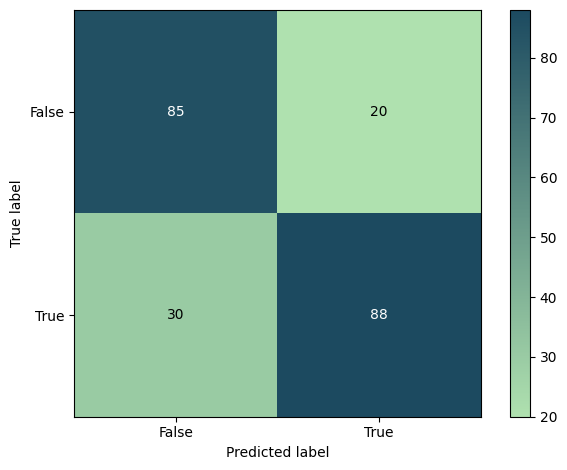

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 88
     - False Positive           : 20
     - True Negative            : 85
     - False Negative           : 30
     - True Positive Rate       :  0.7457627118644068
     - True Negative Rate       :  0.8095238095238095
     - Positive Predictive Value:  0.8148148148148148
     - Negative predictive value:  0.7391304347826086
     - False Positive Rate      :  0.19047619047619047
     - False Negative Rate      :  0.2542372881355932
     - False Discovery Rate     :  0.18518518518518517


In [11]:
SVM_Model(csv_path= "/content/drive/MyDrive/606 captsone/",
          visual_data_dir="/content/drive/MyDrive/606 captsone/OpenFace 2/",
          visual_data_mode="OpenFace",
          audio_data_dir="/content/drive/MyDrive/606 captsone/audio_features/",
          # coord_selection,
          fusion_mode="+",
          visual_approach_type="sequential",  # average or frame-based
          audio_feature_type="MFCC",  # MFCC, RMS, Chroma
          threshold=0.5,
          required_FPS=30,
          input_length_in_seconds=3,
          class_to_num_dict={"truth": 0, "lie": 1},
          train_verbose= False)

###MEDIAPIPE SEQUENTIAL

audio_data_dir updated to: /content/drive/MyDrive/606 captsone/audio_features/MFCC_audio_features

Selected csv_path: /content/drive/MyDrive/606 captsone/
Accuracy: 0.7757847533632287
Precision 0.8148148148148148
Recall 0.7457627118644068


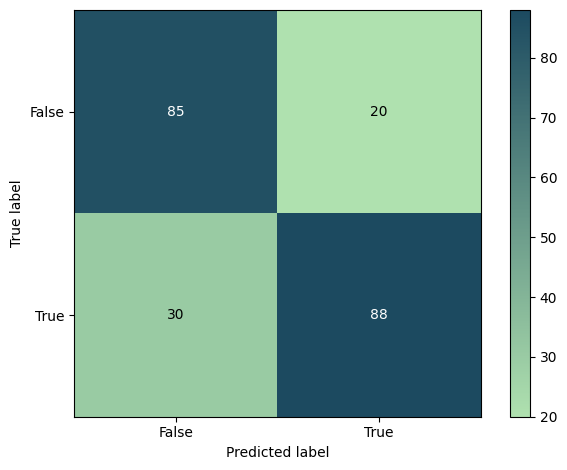

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 88
     - False Positive           : 20
     - True Negative            : 85
     - False Negative           : 30
     - True Positive Rate       :  0.7457627118644068
     - True Negative Rate       :  0.8095238095238095
     - Positive Predictive Value:  0.8148148148148148
     - Negative predictive value:  0.7391304347826086
     - False Positive Rate      :  0.19047619047619047
     - False Negative Rate      :  0.2542372881355932
     - False Discovery Rate     :  0.18518518518518517


In [13]:
SVM_Model(csv_path= "/content/drive/MyDrive/606 captsone/",
          visual_data_dir="/content/drive/MyDrive/606 captsone/mediaPipe_keypoints_data_UPD 2/",
          visual_data_mode="MediaPipe",
          audio_data_dir="/content/drive/MyDrive/606 captsone/audio_features/",
          # coord_selection,
          fusion_mode="+",
          visual_approach_type="sequential",  # average or frame-based
          audio_feature_type="MFCC",  # MFCC, RMS, Chroma
          threshold=0.5,
          required_FPS=30,
          input_length_in_seconds=3,
          class_to_num_dict={"truth": 0, "lie": 1},
          train_verbose= False)